# US10

## Introduction
---
 US10 aims to assess the utilization of park amenities and depict the findings graphically to gain insights into the distribution of equipment usage among park-goers.

## Code and results
---

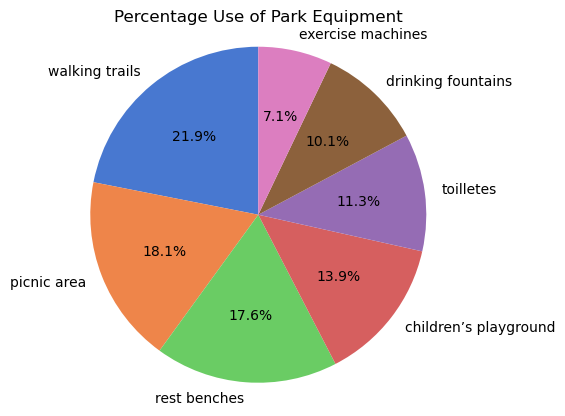

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EQUIPMENT_USED_PATH = "EquipmentUsed.csv"

# Load the data
data = pd.read_csv(EQUIPMENT_USED_PATH)

# Calculate the counts and percentages of equipment usage
equipment_counts = data['Equipment'].value_counts()
total_users = len(data)
equipment_percentages = (equipment_counts / total_users) * 100

# Create a pie chart to visualize the data
plt.pie(equipment_percentages, labels=equipment_percentages.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Percentage Use of Park Equipment')
plt.axis('equal')
plt.show()

## Analysis and Interpretation of the Results
---
The generated pie chart offers a visual representation of the distribution of park equipment usage based on the dataset. This graphical representation facilitates the identification of popular equipment types among park visitors and those that are less utilized. For instance, a significant portion of the pie chart occupied by 'walking trails' suggests a preference for this amenity among users. Conversely, a smaller segment for 'Exercise Equipment' implies comparatively lower usage, possibly influenced by factors such as accessibility, location, or user preferences.
Insights drawn from these patterns can aid park administrators in prioritizing maintenance tasks, considering upgrades, or introducing new equipment varieties to cater to user preferences. Moreover, it offers valuable insights into visitor behavior and park dynamics, informing future planning and development initiatives.

The percentage of usage for different types of park equipment can be calculated using the following formula:
$$
\text{Equipment Percentage} = \left( \frac{\text{Equipment Count}}{\text{Total Users}} \right) \times 100
$$

# US11

## Introduction
---
US11 aims to examine the utilization patterns of the park across different age groups.

## Code and results
---

Y/N             N         Y
Escalao                    
1        0.526718  0.473282
2        0.456044  0.543956
3        0.545455  0.454545


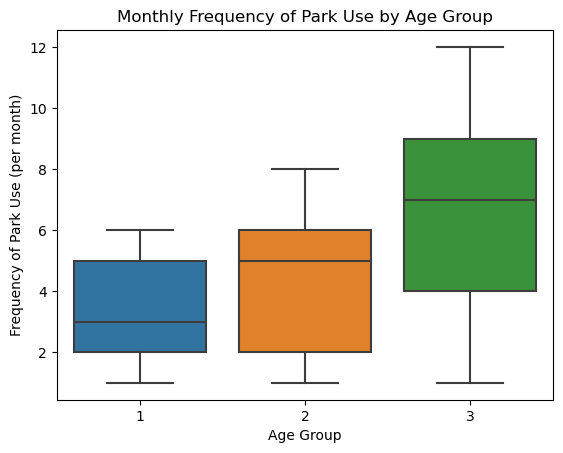

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn.categorical')

data = pd.read_csv("Inquiry.csv", delimiter=";")

data['Escalao'] = data['Escalao'].astype('category')
data['Y/N'] = data['Y/N'].astype('category')

recommendation_proportion = data.groupby('Escalao', observed=False)['Y/N'].value_counts(normalize=True).unstack()

print(recommendation_proportion)

sns.boxplot(x='Escalao', y='Visits', data=data)
plt.title('Monthly Frequency of Park Use by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Park Use (per month)')
plt.show()

# Analysis and Interpretation of the Results
---
### Recommendation Proportion

The data on recommendation proportion offers insights into the likelihood of different age groups accepting recommendations. It enables a direct comparison between the proportions of 'Yes' and 'No' responses within each age group.

For example, a higher proportion of 'Yes' responses in a specific age group suggests a greater inclination towards accepting recommendations.

Upon examination, we note that Age Group 2 exhibits a higher proportion of 'No' responses, indicating a lower propensity to accept recommendations compared to 'Yes' responses. Conversely, Age Group 3 demonstrates a slightly higher proportion of 'Yes' responses, suggesting a higher likelihood of accepting recommendations within that demographic. This indicates that both the youngest and oldest segments of the population are more inclined to recommend the park.

The recommendation proportion for each group is calculated using the following formula:
$$p = \frac{x}{n}$$
Where:
$$ p\text{ represents proportion} $$
$$ x\text{ represents the number of favorable outcomes}$$
$$ n\text{ represents the total number of outcomes.}$$

### Box Plot
The box plot extracted from the dataset provides a concise visual summary of park usage patterns across different age groups. It effectively illustrates the central tendencies, offering insights into the typical monthly frequency of park visits for each demographic category. Variations in the box plot indicate disparities in park usage behavior among various age groups.

For instance, if a particular age group, such as '3', displays a higher central tendency (indicated by the line within the box), it suggests more frequent park visitation compared to other groups.

# US09
## Introduction
The aim of US09 is to precisely calculate the costs associated with the water consumption of a specific green space.
## Code and results

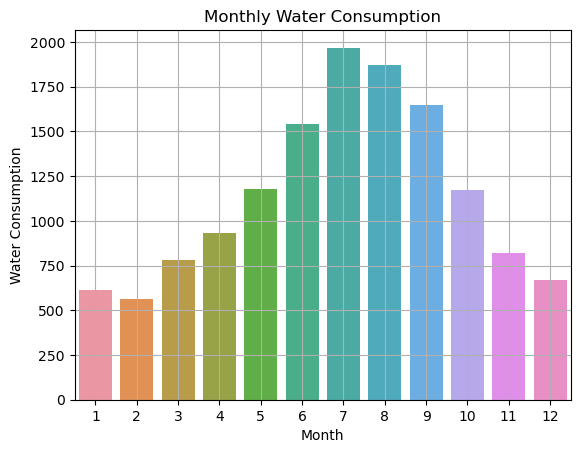

Please input the parks that you wish to calculate the median, separated by commas: Cidade
      Park  Month  Average Consumption
0   Cidade      1            64.832258
1   Cidade      2            67.854868
2   Cidade      3            85.070323
3   Cidade      4           114.762375
4   Cidade      5           123.386643
5   Cidade      6           198.325969
6   Cidade      7           232.677735
7   Cidade      8           220.758354
8   Cidade      9           149.511385
9   Cidade     10           108.521324
10  Cidade     11            85.807970
11  Cidade     12            69.229820


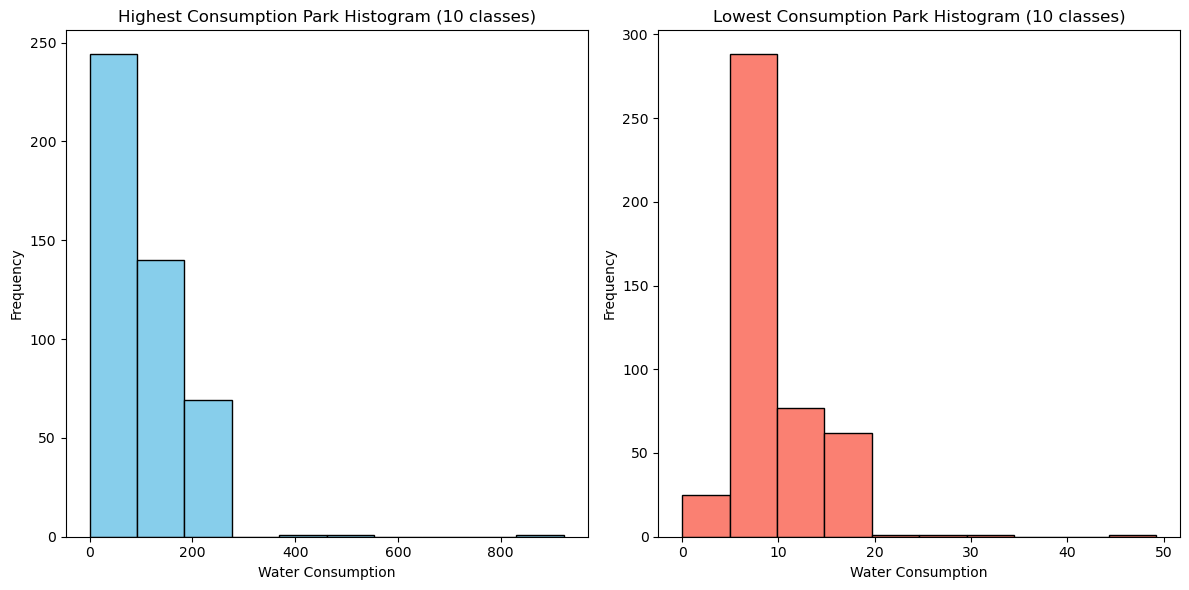

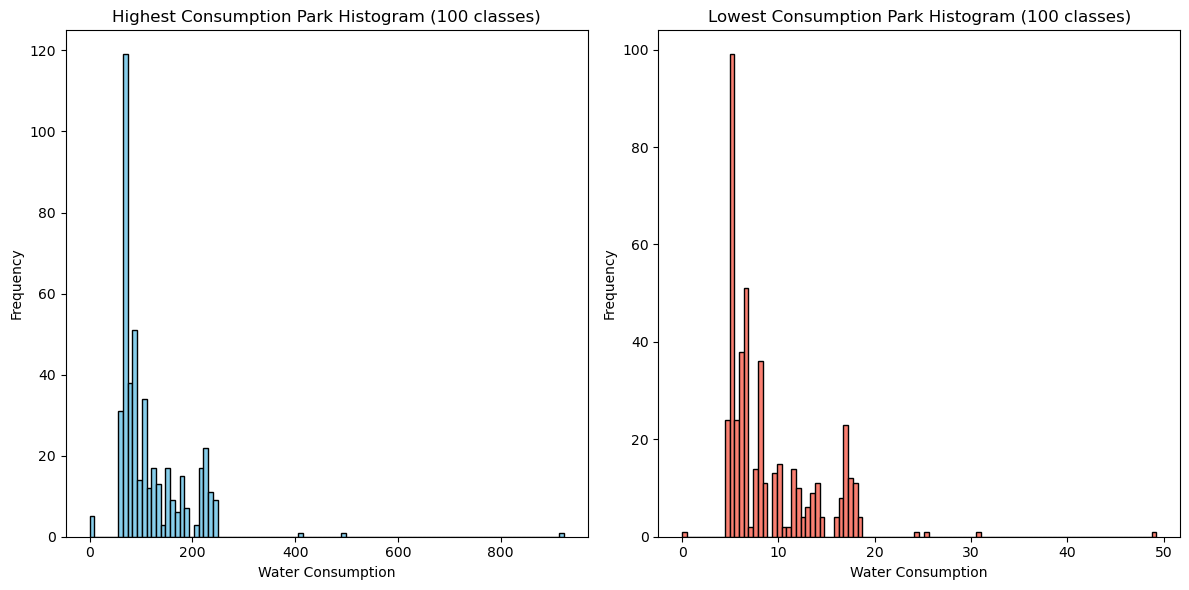

Highest Consumption Park:
Mean: 116.24058906230263
Median: 85.995
Standard Deviation: 71.72487101415582
Coefficient of Skewness: 3.9991704418176997
Outliers: 509     491.400000
804     922.654688
2079    413.595000
Name: Consumption, dtype: float64

Lowest Consumption Park:
Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899769
Coefficient of Skewness: 2.1655606228466815
Outliers: 261     30.555000
651     49.218750
1686    25.352759
1821    24.500000
Name: Consumption, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("water_consumption.csv", sep=";", decimal=",")

def filter_data(data, year, start_month, end_month, park):
    filtered_data = data[(data["Year"] == year) &
                         (data["Month"].between(start_month, end_month)) &
                         (data["Park"] == park)]
    return filtered_data


year = 2023 #Year
start_month = 1  #January
end_month = 12    # March
park_id = 'Oriental'

filtered_data = filter_data(data, year, start_month, end_month, park_id)


monthly_consumption = filtered_data.groupby('Month')['Consumption'].sum().reset_index()


sns.barplot(x='Month', y='Consumption', data=monthly_consumption)
plt.title('Monthly Water Consumption')
plt.xlabel('Month')
plt.ylabel('Water Consumption')
plt.grid(True)
plt.show()

def calculate_monthly_average(data, parks_to_analyze):

    filtered_data2 = data[data['Park'].isin(parks_to_analyze)]


    grouped_data = filtered_data2.groupby(['Park', 'Month'])['Consumption'].mean().reset_index()


    grouped_data.rename(columns={'Consumption': 'Average Consumption'}, inplace=True)

    return grouped_data

parks_to_analyze = input("Please input the parks that you wish to calculate the median, separated by commas: ").split(',')

average_consumption = calculate_monthly_average(data, parks_to_analyze)

print(average_consumption)

highest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmax()
lowest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmin()

highest_consumption_data = data[data['Park'] == highest_consumption_park]['Consumption']
lowest_consumption_data = data[data['Park'] == lowest_consumption_park]['Consumption']


highest_mean = highest_consumption_data.mean()
highest_median = highest_consumption_data.median()
highest_std = highest_consumption_data.std()
highest_skewness = highest_consumption_data.skew()

lowest_mean = lowest_consumption_data.mean()
lowest_median = lowest_consumption_data.median()
lowest_std = lowest_consumption_data.std()
lowest_skewness = lowest_consumption_data.skew()


def build_frequency_table(data, num_classes):
    frequency_table = pd.cut(data, bins=num_classes).value_counts().sort_index()
    relative_frequency = frequency_table / frequency_table.sum()
    return pd.DataFrame({'Absolute Frequency': frequency_table, 'Relative Frequency': relative_frequency})

num_classes = 5
highest_frequency_table = build_frequency_table(highest_consumption_data, num_classes)
lowest_frequency_table = build_frequency_table(lowest_consumption_data, num_classes)


def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

highest_outliers = detect_outliers(highest_consumption_data)
lowest_outliers = detect_outliers(lowest_consumption_data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(highest_consumption_data, bins=10, color='skyblue', edgecolor='black')
plt.title('Highest Consumption Park Histogram (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(lowest_consumption_data, bins=10, color='salmon', edgecolor='black')
plt.title('Lowest Consumption Park Histogram (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(highest_consumption_data, bins=100, color='skyblue', edgecolor='black')
plt.title('Highest Consumption Park Histogram (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(lowest_consumption_data, bins=100, color='salmon', edgecolor='black')
plt.title('Lowest Consumption Park Histogram (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Highest Consumption Park:")
print("Mean:", highest_mean)
print("Median:", highest_median)
print("Standard Deviation:", highest_std)
print("Coefficient of Skewness:", highest_skewness)
print("Outliers:", highest_outliers)

print("\nLowest Consumption Park:")
print("Mean:", lowest_mean)
print("Median:", lowest_median)
print("Standard Deviation:", lowest_std)
print("Coefficient of Skewness:", lowest_skewness)
print("Outliers:", lowest_outliers)

## Data analysis:
The loaded DataFrame includes details about water consumption, such as "Park Identification," "Year," "Month," "Day," and "Consumption" (in m3). 
This DataFrame is then used to generate various statistical measures and visualizations to analyze water usage patterns across different parks.

## Interpretation of Results:
#Barplot representing Monthly Water Consumption:
A bar plot is created to visualize the monthly water consumption for each park based on user-specified parameters such as year, start month, end 
month, and park identification. This visualization provides a clear overview of water usage trends over time within each park, aiding in the effective 
management of water consumption costs.

# Average Monthly Costs Related to Water Consumption:
The analysis calculates the average monthly costs of water consumption for each park, taking into account user-defined parameters such as the number 
of parks to be analyzed and park identification. By determining these average costs, the GSM can allocate budgetary resources efficiently for water 
expenses across various parks.

# Statistical Analysis and Comparison:
Statistical indicators such as mean, median, standard deviation, and coefficient of skewness are calculated to understand the distribution of water 
consumption data for parks with the highest and lowest consumption levels. Relative and absolute frequency tables, divided into five classes, are 
constructed to examine the frequency distribution of water consumption, facilitating comparative analysis between parks. Outliers are identified as 
values that deviate from the median by more than 1.5 times the interquartile range for each park. The data is graphically represented through histograms 
with 10 and 100 classes, providing visual insights into the distribution of water consumption and aiding in comparative analysis.

## Formulas Used:
To calculate the mean:
$$ \text{Mean} = \frac{1}{n} \sum{i=1}^{n} x_i \ $$

If the number of observations is odd, the median is the middle value.
If the number of observations is even, the median is the average of the two central values.

To calculate the standard deviation:
$$ \text{Standard Deviation} = \sqrt{\frac{1}{n-1} \sum{i=1}^{n} (xi - \overline{x})^2} $$ 

To calculate the skewness:
$$ \text{Skewness} = \frac{\sum{i=1}^{n} (x_i - \overline{x})^3}{(n-1) s^3}

# US16
## Introduction
US16 aims to identify the best-fitting line for the given data.

### Polynomial Regression Fit
Polynomial regression is used to understand the relationship between input size and execution time by fitting a 
polynomial curve to the data. This method helps identify trends and allows predictions of execution time based on input size.

### Formula to Calculate Polynomial Regression Fit
The polynomial regression fit is calculated using the formula:
$$y = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0$$

where: 
$$
\begin{aligned}
& y \text{ represents the predicted execution time.} \\
& x \text{ represents the input size.} \\
& a_n, a_{n-1}, \ldots, a_1, a_0 \text{ are the coefficients of the polynomial, determined through regression analysis.} \\
& n \text{ is the degree of the polynomial.}
\end{aligned}
$$

### Choice of Polynomial Degree
Selecting the polynomial degree is critical. Higher-degree polynomials can model more complex relationships but may overfit, 
while lower-degree polynomials provide simpler models that might overlook significant details. The choice of degree depends on 
the user's specific requirements and the data's complexity.

### Analysis of the Fit
To fit a polynomial to the data, we use the np.polyfit function from the numpy library. This function calculates the polynomial coefficients based on the input sizes, execution times, and chosen degree.


## Code and results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV file and parse the data
def read_csv(file_path):
    df = pd.read_csv(file_path)
    input_sizes = df['Input Size'].to_numpy()
    execution_times = df['Execution Time (s)'].to_numpy()
    return input_sizes, execution_times

# Path to the CSV file
file_path =  r'..\execution_time.csv'

# Read the data from the CSV file
input_sizes, execution_times = read_csv(file_path)

# Fit a polynomial of degree to the data
degree = int(input("Degree: "))
coefficients = np.polyfit(input_sizes, execution_times, degree)

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial fit
x_fit = np.linspace(min(input_sizes), max(input_sizes), 500)
y_fit = polynomial(x_fit)

# Plot the original data points
plt.scatter(input_sizes, execution_times, color='red', label='Data points')

# Plot the polynomial fit
plt.plot(x_fit, y_fit, color='blue', label=f'Polynomial fit (degree {degree})')

# Add labels and title
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.title('Polynomial Regression Fit')
plt.legend()

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../execution_time.csv'

## Analysis and Interpretation of the Results

### Interpretation of Results
When we plot the original data points alongside the polynomial fit, we gain a visual representation of how well the polynomial 
models the data. Key points to consider include:

Fit Quality: The proximity of the polynomial curve to the actual data points indicates the fit's quality. A closer fit suggests 
    that the polynomial accurately represents the relationship between input size and execution time.

Trend Identification: The polynomial curve's shape reveals how execution time varies with input size. For example, an upward 
    trend suggests that execution time increases as input size grows.

Prediction Utility: The polynomial function can predict execution times for input sizes not present in the original dataset, 
    making it a useful tool for estimating performance and planning.